In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pwd = os.getcwd()

In [4]:
df = pd.read_csv(pwd + '\\data\\Dataset_Capstone.csv')
df

,Text,Mood
0,i did there was a mental debate i can eat the ...,anger
1,i dont know how but i forgot how to communicat...,anger
2,i started to feel grumpy and frustrated,anger
3,i also feel insincere shallow and fake,anger
4,i feel petty for it but i think less of you as...,anger
...,...,...
39995,JamieLynnMB i had my son when i was 16hes now ...,worry
39996,sneezing is never a good sign,worry
39997,Awe i feel so left out,worry
39998,LAPPYTOP BATERRRY DYINGtryingtofind a movieto ...,worry


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    40000 non-null  object
 1   Mood    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [6]:
df.value_counts("Mood")

Mood
anger      5000
fear       5000
happy      5000
joy        5000
love       5000
neutral    5000
sadness    5000
worry      5000
Name: count, dtype: int64

In [7]:
df.isna().sum()

Text    0
Mood    0
dtype: int64

Text(0.5, 1.0, 'Mood')

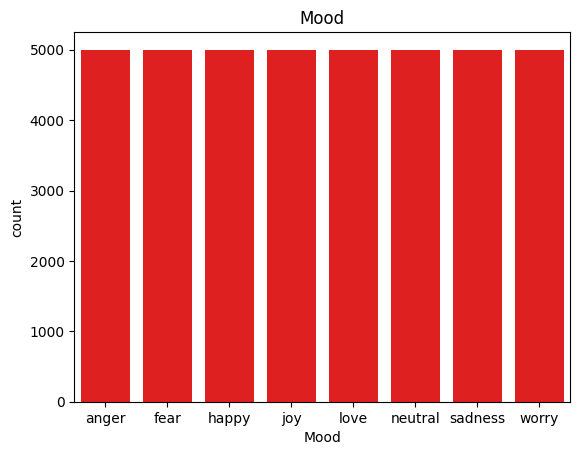

In [8]:
sns.countplot(x = df["Mood"], color='red')
plt.title("Mood")

In [9]:
df['char_length'] = df['Text'].apply(lambda x : len(x))
df['token_length'] = df['Text'].apply(lambda x : len(x.split(" ")))

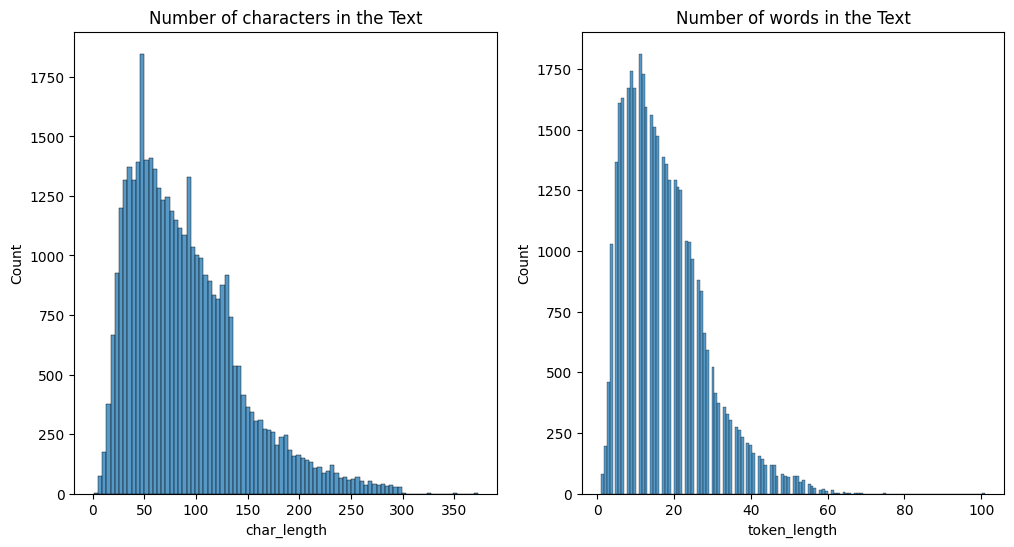

In [10]:
fig, (ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(df['char_length'], ax=ax1)
sns.histplot(df['token_length'], ax=ax2)
ax1.set_title('Number of characters in the Text')
ax2.set_title('Number of words in the Text')
plt.show()

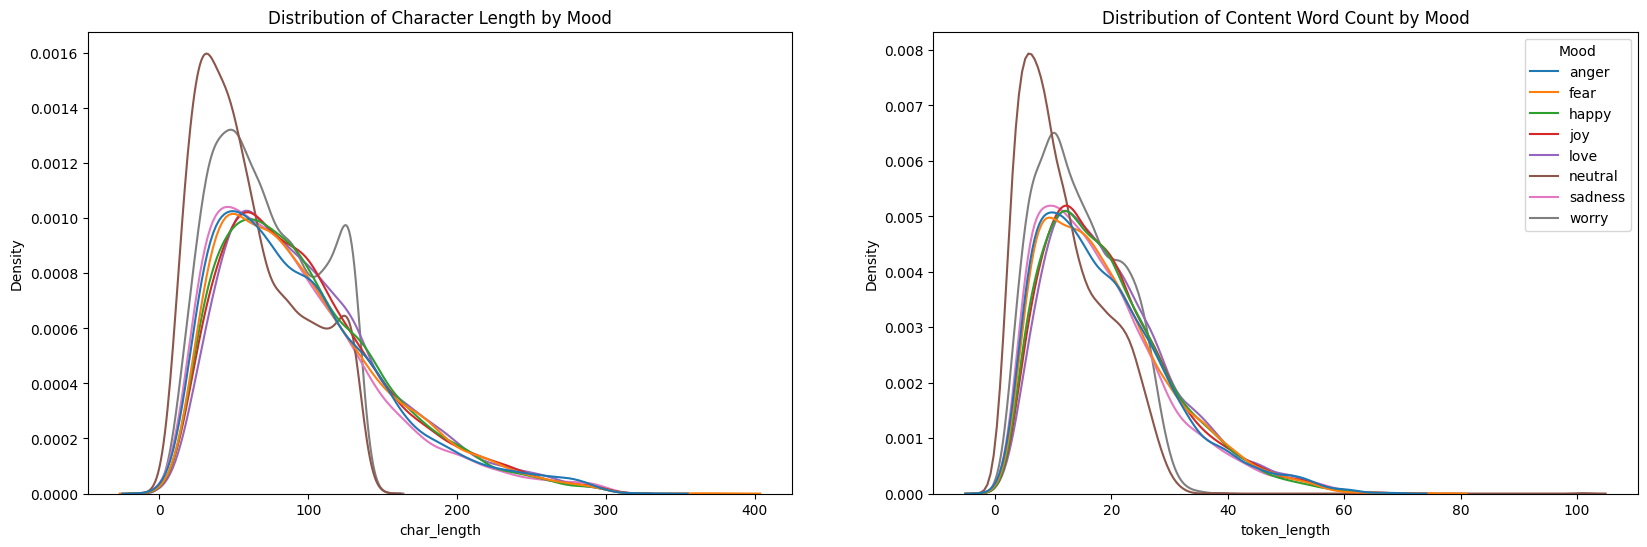

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.kdeplot(x=df['char_length'], hue=df['Mood'], ax=ax1, label='char_length', legend=False)
ax1.set_title('Distribution of Character Length by Mood')
sns.kdeplot(x=df['token_length'], hue=df['Mood'], ax=ax2, label='token_length')
ax2.set_title('Distribution of Content Word Count by Mood')

plt.show()

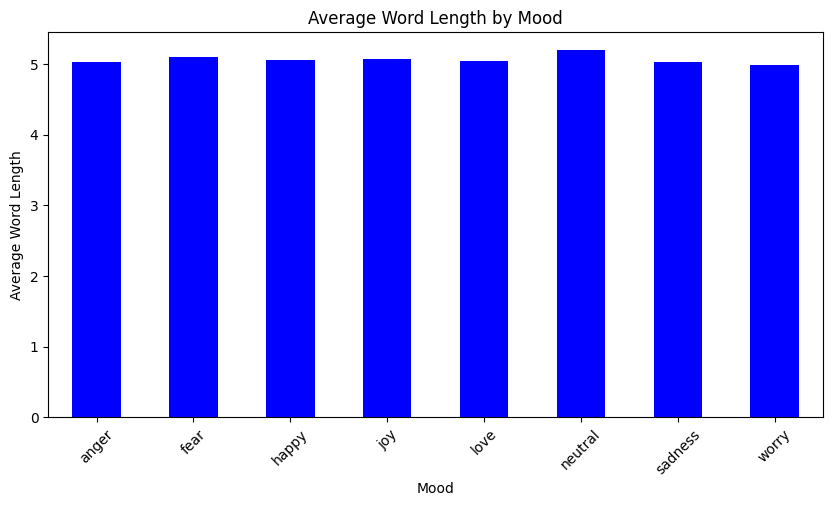

In [12]:
# mean word length for each category.
grouped = df.groupby('Mood')[['char_length', 'token_length']].sum()
grouped['avg_word_len'] = grouped['char_length'] / grouped['token_length']

plt.figure(figsize=(10,5))
ax = grouped['avg_word_len'].plot(kind='bar', color='blue')
ax.set_xticklabels(grouped.index, rotation=45)

plt.title('Average Word Length by Mood')
plt.xlabel('Mood')
plt.ylabel('Average Word Length')

plt.show()